In [ ]:
### TODOs
# how to get box size from header?
# Why do DM particles have different masses? => Monofonic
# where to find the σ8 and ns values?

In [ ]:
### Notes on units 
## x, y, z are in comoving Mpc (no h)
## Rvir are in comoving Mpc (no h)
## All masses are in Msun (no h) (need to mulplity by 1e10)
## Always convert unit immediately after reading in the data!
## All my saved files are in Msun/h, cMpc/h units

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
#### location on cosma
#sim_name = 'L1000N1800/HYDRO_PLANCK'
sim_name = 'L1000N0900/HYDRO_FIDUCIAL'
loc = f'/cosma8/data/dp004/flamingo/Runs/{sim_name}/'

In [3]:
#### find out the snapshot id ####
redshift = 0.3
scale_factor = 1./(1.+redshift)
z_output = np.loadtxt(loc + 'output_list.txt')
snap_id_list = np.arange(len(z_output))
idx = np.argmin(abs(z_output-redshift))
snap_id = snap_id_list[idx]
snap_name = f'{snap_id:0>4d}'
print('z=0.3 snap id', snap_name)

z=0.3 snap id 0071


In [4]:
#### read the cosmo parameters from header ####
yml_fname = loc + 'used_parameters.yml'
import yaml
with open(yml_fname, 'r') as stream:
    try:
        parsed_yaml = yaml.safe_load(stream)
        #print(parsed_yaml)
        #print(parsed_yaml['Cosmology'])
    except yaml.YAMLError as exc:
        print(exc)

cosmo = parsed_yaml['Cosmology']
h = cosmo['h']
print('h =', h)
H0 = 100 * h
Omega_r = 7.7918e-05 ### check! 
Om0 = 1 - cosmo['Omega_lambda'] - Omega_r
Ob0 = cosmo['Omega_b']

h = 0.681


## SOAP-HBT

In [5]:
fname = loc + f'SOAP-HBT/halo_properties_{snap_name}.hdf5'
f = h5py.File(fname,'r')
print(f.keys())

<KeysViewHDF5 ['BoundSubhalo', 'Cells', 'Code', 'Cosmology', 'ExclusiveSphere', 'Header', 'InclusiveSphere', 'InputHalos', 'Parameters', 'PhysicalConstants', 'ProjectedAperture', 'SO', 'SOAP', 'SWIFT', 'Units']>


In [6]:
print(f['InputHalos'].keys())
id_hbt = f['InputHalos/HaloCatalogueIndex']
pos = f['InputHalos/HaloCentre']
x = pos[:,0] * h # Mpc/h
y = pos[:,1] * h
z = pos[:,2] * h

<KeysViewHDF5 ['FOF', 'HBTplus', 'HaloCatalogueIndex', 'HaloCentre', 'IsCentral', 'NumberOfBoundParticles']>


999.9995695962621
None


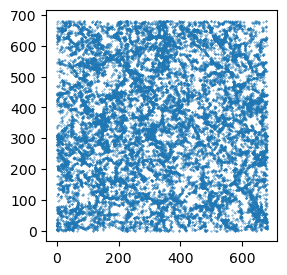

In [7]:
# checking the unit of positions
print(print(max(pos[:,0]))) # cMpc (no h)
plt.figure(figsize=(3,3))
plt.scatter(x[z<10], y[z<10], s=0.1)
ax = plt.gca()
ax.set_aspect('equal')

In [ ]:
#print(f['InputHalos/HBTplus'].keys())

In [8]:
vel = f['BoundSubhalo/CentreOfMassVelocity']

In [9]:
L = f['BoundSubhalo/StellarLuminosity']  #u, g, r, i, z, Y, J, H, K
L_g = L[:,1]
L_r = L[:,2]
L_i = L[:,3]
L_z = L[:,4] # z-band

In [10]:
'%g'%max(L_i)

'1.45224e+11'

In [11]:
#### read the host halos ####
iscen = f['InputHalos/IsCentral'][:]
sel = (iscen == 1)
print(len(iscen), len(iscen[sel]))
# print(f['SO/BN98'].keys())

Mvir = f['SO/BN98/TotalMass'][:] * 1e10 * h # Msun/h
Rvir =  f['SO/BN98/SORadius'][:] * h # comoving Msun/h

M200 = f['SO/200_mean/TotalMass'][:] * 1e10 * h # Msun/h
R200 =  f['SO/200_mean/SORadius'][:] * h # comoving Msun/h

# check R200 unit!
rhocrit = 2.775e11 # comoving with h
OmegaM = Om0
boxsize = 1000 * h
M200_test = (4*np.pi/3)* R200**3 * rhocrit * OmegaM * 200

print('%e'%max(Mvir))
print('%e'%max(Rvir))

print(M200_test[sel] / M200[sel])

2357222 1928022
1.431299e+15
2.505867e+00
[1.0042479 1.0031822 1.0069827 ... 1.0052354 1.0060818 1.0052538]


In [12]:
sel2 = M200 > 0
print('Are (iscen == 1) and (M200>0) the same?', all(sel == sel2))
sel3 = Mvir > 0
print('Are (iscen == 1) and (Mvir>0) the same?', all(sel == sel3))

print('Are (M200>0) and (Mvir>0) the same?', all(sel2 == sel3))
#### WHY??? Bug
print(len(Mvir[sel]), len(Mvir[sel2]), len(Mvir[sel3]))
### Mvir is unreliable!

Are (iscen == 1) and (M200>0) the same? True
Are (iscen == 1) and (Mvir>0) the same? False
Are (M200>0) and (Mvir>0) the same? False
1928022 1928022 633570


In [14]:
### What's the difference if Mvir == 0?
print('%e'%min(M200[iscen==1]))
print(min(Mvir[iscen==1]))
# problematic halos
print(np.sort(M200[Mvir==0])[::-1][:100])

2.489906e+10
0.0
[1.6344000e+13 1.3497419e+13 1.3265880e+13 1.2939000e+13 1.2925379e+13
 1.2394200e+13 1.1971979e+13 1.1863021e+13 1.1672340e+13 1.1399940e+13
 1.0977720e+13 1.0855140e+13 1.0732560e+13 1.0678079e+13 1.0596360e+13
 1.0569120e+13 1.0460160e+13 1.0405680e+13 1.0337579e+13 1.0269480e+13
 1.0269480e+13 1.0174140e+13 9.7655403e+12 9.7519193e+12 9.7110605e+12
 9.5748599e+12 9.4931402e+12 9.1390193e+12 9.0709195e+12 9.0436796e+12
 9.0436796e+12 9.0300597e+12 8.9891998e+12 8.9755799e+12 8.9347200e+12
 8.9211001e+12 8.9074801e+12 8.8530003e+12 8.8121404e+12 8.7440396e+12
 8.6623199e+12 8.6214600e+12 8.6078396e+12 8.6078396e+12 8.5942201e+12
 8.5942201e+12 8.5669802e+12 8.5669802e+12 8.5533597e+12 8.5533597e+12
 8.5397398e+12 8.5261198e+12 8.5261198e+12 8.4852600e+12 8.2673397e+12
 8.2400998e+12 8.1856199e+12 8.1720000e+12 8.1447601e+12 8.1447601e+12
 8.0902803e+12 8.0902803e+12 8.0902803e+12 8.0630398e+12 7.9404602e+12
 7.9268398e+12 7.8859804e+12 7.8859804e+12 7.8178796e+12 7.6

In [15]:
Mstar = f['BoundSubhalo/StellarMass'][:] * 1e10

In [16]:
print('%e'%max(Mstar))

1.470000e+13


## SOAP-VR (obsolete)

In [ ]:
#### read the SOAP-VR file (subhalos + galaxies)
#### NOTE! Use HBT instead!
fname = loc + f'SOAP-VR/halo_properties_{snap_name}.hdf5'
f = h5py.File(fname,'r')
print(f.keys())
## From the SOAP Manual:
## "VR" subhalo catalog (positions and memberships) are the basis of all properties
## All columns have the same length (VR subhalos)
## "FOFSubhaloProperties" includes all (bound and unbound) particles
## "BoundSubhaloProperties" includes only bound particles  => What I need 
## "SO" are based on VR subhalo centers, zero mass for subhalos => What I need

In [ ]:
#### read the galaxies (bound particles)
# print(f['BoundSubhaloProperties'].keys())
Mstar = f['BoundSubhaloProperties/StellarMass']
id_vr = f['VR/ID']
pos = f['VR/CentreOfPotential']
x = pos[:,0] * h # Mpc/h
y = pos[:,1] * h
z = pos[:,2] * h

# getting the luminosities
L = f['BoundSubhaloProperties/StellarLuminosity']  #u, g, r, i, z, Y, J, H, K
L_g = L[:,1]
L_r = L[:,2]
L_i = L[:,3]
L_z = L[:,4] # z-band

In [ ]:
#### read the host halos ####
structype = f['VR/StructureType'][:]
sel = (structype == 10) # field halos # the same as Mvir > 0

# print(f['SO/BN98'].keys())

Mvir = f['SO/BN98/TotalMass'][:] * h # Msun/h
Rvir =  f['SO/BN98/SORadius'][:] * h #/ scale_factor # comoving Msun/h

M200 = f['SO/200_mean/TotalMass'][:] * h # Msun/h
R200 =  f['SO/200_mean/SORadius'][:] * h #/ scale_factor # comoving Msun/h

sel2 = M200 > 0
print('Are (structype == 10) and (M200>0) the same?', all(sel == sel2))
sel3 = Mvir > 0
print('Are (M200>0) and (Mvir>0) the same?', all(sel2 == sel3))

In [ ]:
# check R200 unit!
rhocrit = 2.775e11 # comoving with h
OmegaM = Om0
boxsize = 1000 * h
M200_test = (4*np.pi/3)* R200**3 * rhocrit * OmegaM * 200

print('%e'%max(Mvir))
print('%e'%max(Rvir))

print(M200_test[sel] / M200[sel])

#### read the dark matter particles ####

In [ ]:
fname_part = loc + f'snapshots_downsampled/flamingo_{snap_name}.hdf5'
f_part = h5py.File(fname_part,'r')
print(f_part.keys())
print(f_part['DMParticles'].keys())
coord = f_part['DMParticles/Coordinates']
xp = coord[:,0] * h
yp = coord[:,1] * h
zp = coord[:,2] * h